# <img style="float: left; padding-right: 100px; width: 300px" src="image/logo.png">AI4SG Bootcamp:


## Data representation and feature engineering 
**Authors:** Davis


---

### Introduction

### Load data

In [67]:
import numpy as np
np.random.seed(42)#for reproducible experiments
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
%matplotlib inline

import warnings ## importing warnings library. 
warnings.filterwarnings('ignore') ## Ignore warning 

In [8]:
DATA_PATH = "../data/students_exams_results.csv"

In [9]:
data = pd.read_csv(DATA_PATH) 

In [10]:
data.head()

,continue_drop,student_id,gender,caste,mathematics_marks,english_marks,science_marks,science_teacher,languages_teacher,guardian,internet,school_id,total_students,total_toilets,establishment_year
0,continue,s17477,M,BC,0.393,0.338,0.393,2,2,mother,1,362,397,5.0,1950.0
1,continue,s16612,M,SC,0.745,0.645,0.745,4,3,father,1,357,57,14.0,1929.0
2,continue,s04010,M,BC,0.788,0.655,0.788,8,9,father,1,340,134,15.0,1976.0
3,drop,s11124,F,BC,0.623,0.699,0.623,6,0,father,1,345,143,28.0,1879.0
4,continue,s04384,M,SC,0.951,0.704,0.951,8,4,mother,1,304,390,28.0,1914.0


### Check missing values

In [14]:
total = data.isnull().sum().sort_values(ascending = False)
percent = round(data.isnull().sum().sort_values(ascending = False)/len(data)*100, 2)
missing_column=pd.concat([total, percent], axis = 1,keys= ['Total', 'Percent']) 
missing_column

,Total,Percent
establishment_year,309,1.8
total_toilets,309,1.8
total_students,0,0.0
school_id,0,0.0
internet,0,0.0
guardian,0,0.0
languages_teacher,0,0.0
science_teacher,0,0.0
science_marks,0,0.0
english_marks,0,0.0


One percent of data is missing in  total toilets and establishment year columns. Let ignore these columns by addding the following line in the load data function. We will also delete the student id column
 

Question: What techniques can we use to handle this missing values?

We will use this techniques later to address missing values

### Check data type

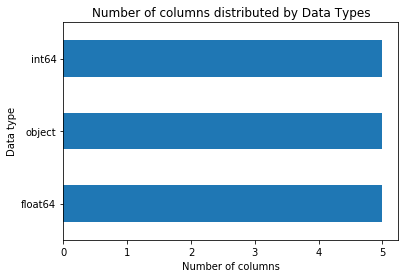

In [11]:
data.dtypes.value_counts().sort_values().plot(kind='barh')
plt.title('Number of columns distributed by Data Types')
plt.xlabel('Number of columns')
plt.ylabel('Data type');
plt.savefig("data_distribution.pdf", dpi=600)

Let us see how many categorical data do the columns having 'object' data types contain:

In [17]:
object_column=data.select_dtypes(include=['object']).columns
category_num=data[object_column].apply(pd.Series.nunique, axis = 0).sort_values(ascending = False)
category_num=pd.concat([category_num], axis = 1,keys= ['Total']) 
category_num

,Total
student_id,17190
guardian,4
caste,4
gender,2
continue_drop,2


We will have to encode the columns having only 2 categorical data and one-hot encode columns with more than 2 categorical data. However the column with several categorical data need special attention. 

The student_id column have more than 17190 with very less unique data for each category. 
We will drop this  column.

In [18]:
data.drop(['student_id'], axis=1, inplace=True)   

### int data type

In [22]:
int_column=data.select_dtypes(include=['int64']).columns

In [23]:

int_num=data[int_column].apply(pd.Series.nunique, axis = 0).sort_values(ascending = False)
int_num=pd.concat([int_num], axis = 1,keys= ['Total']) 
int_num

,Total
school_id,100
total_students,90
languages_teacher,13
science_teacher,10
internet,2


In [24]:
data[int_column].head()

,science_teacher,languages_teacher,internet,school_id,total_students
0,2,2,1,362,397
1,4,3,1,357,57
2,8,9,1,340,134
3,6,0,1,345,143
4,8,4,1,304,390


To decide wether these column are numeric or categorical let visualize their histogram

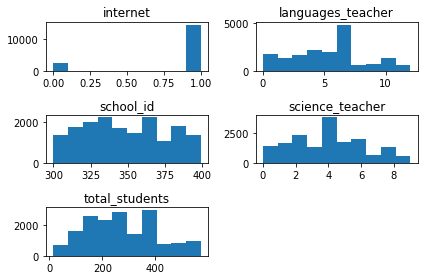

In [28]:
data[int_column].hist(grid=False);
plt.tight_layout()

It clear with exception to internet column the rest of the column are numeric. We will therefore cahnge their data type to float.

In [29]:
def convert_int_float(df):
    return df.astype('float64')

data['languages_teacher'] = convert_int_float(data['languages_teacher'])
data['school_id'] = convert_int_float(data['school_id'])
data['total_students'] = convert_int_float(data['total_students'])

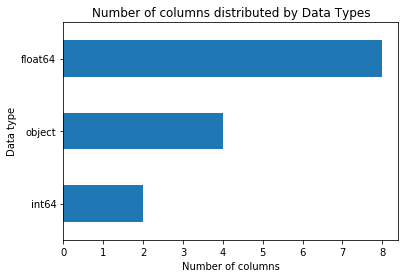

In [30]:
data.dtypes.value_counts().sort_values().plot(kind='barh')
plt.title('Number of columns distributed by Data Types')
plt.xlabel('Number of columns')
plt.ylabel('Data type');
plt.savefig("data_distribution.pdf", dpi=600)

In [31]:
numeric_column=data.select_dtypes(include=['float64']).columns

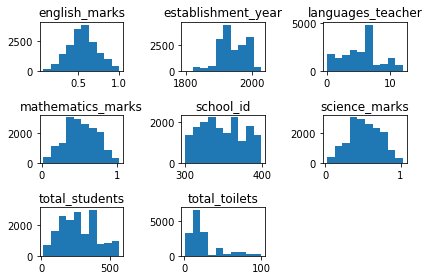

In [34]:
data[numeric_column].hist(grid=False);
plt.tight_layout()

### Process categorical data

In [36]:
object_column=list(data.select_dtypes(include=['object']).columns)
int_column=list(data.select_dtypes(include=['int64']).columns)

categ_column = object_column + int_column
categ_column

['continue_drop', 'gender', 'caste', 'guardian', 'science_teacher', 'internet']

There is no categorical column with missing value

In [39]:
total = data[categ_column].isnull().sum().sort_values(ascending = False)
missing_column=pd.concat([total], axis = 1,keys= ['Total']) 
categ_column_with_missing = list(missing_column[missing_column['Total']>0].index)
categ_column_with_missing

[]

In [82]:
categ_data = data[categ_column]

In [83]:
categ_data.head()

,continue_drop,gender,caste,guardian,science_teacher,internet
0,continue,M,BC,mother,2,1
1,continue,M,SC,father,4,1
2,continue,M,BC,father,8,1
3,drop,F,BC,father,6,1
4,continue,M,SC,mother,8,1


Skealrn offer several method for handling categorical data

- **LabelEncoder**: Encode labels with value between 0 and n_classes-1.It can also be used to transform non-numerical labels (as long as they are hashable and comparable) to numerical labels.
- OneHotEncoder: Encode categorical integer features as a one-hot numeric array
- OrdinalEncoder: Encode categorical features as an integer array.

In [76]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder

In [77]:
def label_encode(x):
    le = LabelEncoder()
    return le.fit_transform(x)

In [98]:
label_encode(categ_data[["guardian"]])

array([2, 0, 0, ..., 2, 2, 0])

Label encoding has the advantage that it is straightforward but it has the disadvantage that the numeric values can be “misinterpreted” by the algorithms. For example, the value of 0 is obviously less than the value of 4 but does that really correspond to the data set in real life?

Activity: Use apply function to encode all categorical data with label encoding

### One hot encoding

After label encoding, we might confuse our model into thinking that a column has data with some kind of order or hierarchy, when we clearly don’t have it.To avoid this, we ‘OneHotEncode’ that column.

What one hot encoding does is, it takes a column which has categorical data, which has been label encoded, and then splits the column into multiple columns. The numbers are replaced by 1s and 0s, depending on which column has what value.


In [96]:
def one_hot_encode(x):
    one_hot = OneHotEncoder(handle_unknown='ignore')
    return one_hot.fit_transform(x).toarray()

In [97]:
one_hot_encode(categ_data[["guardian"]])

array([[0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       ...,
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.]])

In [103]:
def ord_encode(x):
    ord_enc = OrdinalEncoder()
    return ord_enc.fit_transform(x)

In [104]:
ord_encode(categ_data[["guardian"]])

array([[2.],
       [0.],
       [0.],
       ...,
       [2.],
       [2.],
       [0.]])

Question: What is the difference between label, one-hot and ordinal encoder

## Process numerical data

In [106]:
numeric_column=list(data.select_dtypes(include=['float64']).columns)
total = data[numeric_column].isnull().sum().sort_values(ascending = False)
missing_column=pd.concat([total], axis = 1,keys= ['Total']) 
numeric_column_with_missing = list(missing_column[missing_column['Total']>0].index)
numeric_column_with_missing

['establishment_year', 'total_toilets']

In [107]:
numeric_data = data[numeric_column]
numeric_data.head()

,mathematics_marks,english_marks,science_marks,languages_teacher,school_id,total_students,total_toilets,establishment_year
0,0.393,0.338,0.393,2.0,362.0,397.0,5.0,1950.0
1,0.745,0.645,0.745,3.0,357.0,57.0,14.0,1929.0
2,0.788,0.655,0.788,9.0,340.0,134.0,15.0,1976.0
3,0.623,0.699,0.623,0.0,345.0,143.0,28.0,1879.0
4,0.951,0.704,0.951,4.0,304.0,390.0,28.0,1914.0


In [108]:
### handle missing values
for column in numeric_column_with_missing:
    numeric_data[column] = numeric_data[column].transform(lambda x: x.fillna(x.median()))

In [109]:
total = numeric_data.isnull().sum().sort_values(ascending = False)
missing_column=pd.concat([total], axis = 1,keys= ['Total']) 
numeric_column_with_missing = list(missing_column[missing_column['Total']>0].index)
numeric_column_with_missing

[]

Skealrn offer several method for handling categorical data


- **MaxAbsScaler**:	Scale each feature by its maximum absolute value.
- **MinMaxScaler**: Transforms features by scaling each feature to a given range.
- **Normalizer**: Normalize samples individually to unit norm commonly used for text classification or clustering for instance.
- **RobustScaler**: Scale features using statistics that are robust to outliers.
- **StandardScaler**: Standardize features by removing the mean and scaling to unit 
- **KBinsDiscretizer**: Bin continuous data into intervals.

In [148]:
from sklearn.preprocessing import MaxAbsScaler,MinMaxScaler, RobustScaler, StandardScaler, KBinsDiscretizer 

In [137]:
def min_max_scaler(x):
    transform = MinMaxScaler()
    return transform.fit_transform(x)


def robust_scaler(x):
    transform = RobustScaler()
    return transform.fit_transform(x)

def standard(x):
    transform = StandardScaler()
    return transform.fit_transform(x)

In [138]:
numeric_data.head()

,mathematics_marks,english_marks,science_marks,languages_teacher,school_id,total_students,total_toilets,establishment_year
0,0.393,0.338,0.393,2.0,362.0,397.0,5.0,1950.0
1,0.745,0.645,0.745,3.0,357.0,57.0,14.0,1929.0
2,0.788,0.655,0.788,9.0,340.0,134.0,15.0,1976.0
3,0.623,0.699,0.623,0.0,345.0,143.0,28.0,1879.0
4,0.951,0.704,0.951,4.0,304.0,390.0,28.0,1914.0


In [139]:
min_max=min_max_scaler(numeric_data[['total_toilets']])
min_max

array([[0.04040404],
       [0.13131313],
       [0.14141414],
       ...,
       [0.3030303 ],
       [0.14141414],
       [0.01010101]])

In [140]:
rbs=robust_scaler(numeric_data[['total_toilets']])
rbs

array([[-0.71428571],
       [-0.07142857],
       [ 0.        ],
       ...,
       [ 1.14285714],
       [ 0.        ],
       [-0.92857143]])

In [141]:
std=standard(numeric_data[['total_toilets']])
std

array([[-0.89838486],
       [-0.47187301],
       [-0.42448281],
       ...,
       [ 0.33376048],
       [-0.42448281],
       [-1.04055547]])

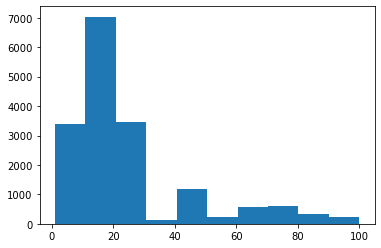

In [142]:
plt.hist(numeric_data['total_toilets'].values, bins=10);

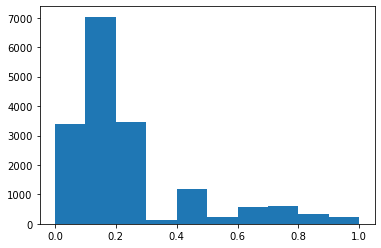

In [143]:
plt.hist(min_max, bins=10);

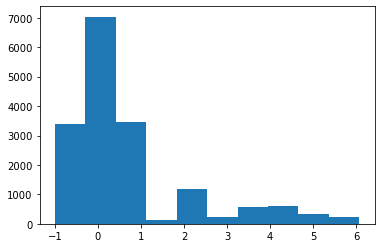

In [144]:
plt.hist(rbs, bins=10);

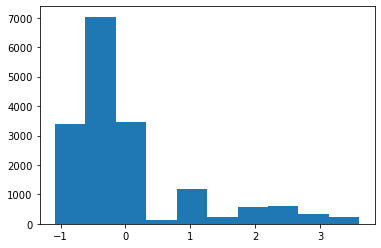

In [145]:
plt.hist(std, bins=10);

### Binning 
Sklearn provides a KBinsDiscretizer class that can take care of this. The only thing you have to specify are the number of bins (n_bins) for each feature and how to encode these bins (ordinal, onehot or onehot-dense)..The optional strategy parameter can be set to three values:
- uniform, where all bins in each feature have identical widths.
- quantile (default), where all bins in each feature have the same number of points.
- kmeans, where all values in each bin have the same nearest center of a 1D k-means cluster.

In [173]:
def bin_data(x):
    transform = KBinsDiscretizer(n_bins=100, encode='ordinal', strategy='kmeans')
    return transform.fit_transform(x)

In [174]:
bins = bin_data(numeric_data[['total_toilets']])

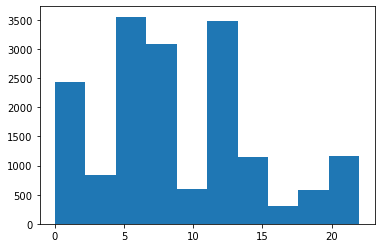

In [175]:
plt.hist(bins, bins=10);

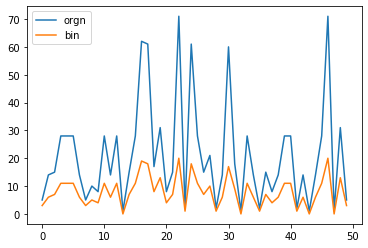

In [178]:
plt.plot(numeric_data[['total_toilets']].values[:50], label="orgn")
plt.plot(bins[:50], label="bin")
plt.legend()